<a href="https://colab.research.google.com/github/chitra-psg/rossmann_sales_prediction/blob/main/Rossman_Sales_Prediction_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Rossman Sales Forecasting**

***Problem*** : Rossmann is a European drug distributor which operates over 3,000 drug stores across seven European countries. Since a lot of drugs come with a short shelf life, that is, they do not have a long expiry date, it becomes imperative for Rossmann to accurately forecast sales at their individual stores. Currently, the forecasting is taken care of by the store managers who are tasked with forecasting daily sales for the next six weeks.As expected, store sales are influenced by many factors, including promotional campaigns, competition, state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances and intuitions, the accuracy of the forecasts is quite varied.

*Build a forecasting model to forecast the daily sales for the next six weeks*

In [3]:
#importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

### **Data Processing**

#### **Source Data**

In [4]:
store = pd.read_csv('store.csv')
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [5]:
sales = pd.read_csv('train.csv')
sales.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [7]:
store_sales_full = sales.merge(right=store, on='Store', how='left')
store_sales_full.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


from matplotlib import pyplot as plt
_df_0['Store'].plot(kind='hist', bins=20, title='Store')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Sales'].plot(kind='hist', bins=20, title='Sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Customers'].plot(kind='hist', bins=20, title='Customers')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['CompetitionDistance'].plot(kind='hist', bins=20, title='CompetitionDistance')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('StoreType').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('Assortment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('PromoInterval').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Store', y='Sales', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='Sales', y='Customers', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='Customers', y='CompetitionDistance', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='CompetitionDistance', y='CompetitionOpenSinceMonth', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Store']
  ys = series['Sales']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Store', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('StoreType')):
  _plot_series(series, series_name, i)
  fig.legend(title='StoreType', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Store')
_ = plt.ylabel('Sales')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Store']
  ys = series['Sales']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('Store', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Assortment')):
  _plot_series(series, series_name, i)
  fig.legend(title='Assortment', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Store')
_ = plt.ylabel('Sales')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Store']
  ys = series['Sales']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('Store', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('PromoInterval')):
  _plot_series(series, series_name, i)
  fig.legend(title='PromoInterval', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Store')
_ = plt.ylabel('Sales')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Store']
  ys = series['Customers']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('Store', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('StoreType')):
  _plot_series(series, series_name, i)
  fig.legend(title='StoreType', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Store')
_ = plt.ylabel('Customers')

from matplotlib import pyplot as plt
_df_15['Store'].plot(kind='line', figsize=(8, 4), title='Store')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['Sales'].plot(kind='line', figsize=(8, 4), title='Sales')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['Customers'].plot(kind='line', figsize=(8, 4), title='Customers')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['CompetitionDistance'].plot(kind='line', figsize=(8, 4), title='CompetitionDistance')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Assortment'].value_counts()
    for x_label, grp in _df_19.groupby('StoreType')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('StoreType')
_ = plt.ylabel('Assortment')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['PromoInterval'].value_counts()
    for x_label, grp in _df_20.groupby('Assortment')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Assortment')
_ = plt.ylabel('PromoInterval')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_21['StoreType'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_21, x='Store', y='StoreType', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_22['Assortment'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_22, x='Store', y='Assortment', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_23['PromoInterval'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_23, x='Store', y='PromoInterval', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['StoreType'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='Sales', y='StoreType', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [8]:
store_sales_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [9]:
#store_sales = store_sales_full[
#        (store_sales_full.Store == 1) | (store_sales_full.Store == 3)| (store_sales_full.Store == 8)| (store_sales_full.Store == 9)| (store_sales_full.Store == 13) |
#        (store_sales_full.Store == 25) | (store_sales_full.Store == 29)| (store_sales_full.Store == 31)| (store_sales_full.Store == 46)
#     ]


In [10]:
store_sales = store_sales_full

In [11]:
store_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [12]:
#Check nulls for null treatment
store_sales.isna().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

In [16]:
#Competition Details
store_sales[((~ store_sales['CompetitionDistance'].isna()) & store_sales['CompetitionOpenSinceMonth'].isna())]
# Although distance is available but no start date avaialble

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,5,2015-07-31,8959,962,1,1,0,1,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,5,2015-07-31,8821,568,1,1,0,0,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,5,2015-07-31,10231,979,1,1,0,1,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,5,2015-07-31,8234,718,1,1,0,1,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,5,2015-07-31,6566,633,1,1,0,0,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017189,1096,2,2013-01-01,0,0,0,0,a,1,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1017193,1100,2,2013-01-01,0,0,0,0,a,1,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [13]:
#Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
store_sales.Promo2.value_counts()

1    509178
0    508031
Name: Promo2, dtype: int64

#### ***Findings*** :

1. When no Promo (Promo2 =0) then no Promo related details available in Promo2SinceWeek , Promo2SinceYear and PromoInterval
2. Object data type columns Date, State Holiday need to convert.
3. Null in competition fields like CompetitionOpenSinceMonth and CompetitionOpenSinceYear indicate information is missing and needs to be fixed.

In [24]:

# Convert Date to a date-time-object
store_sales['Date'] = pd.to_datetime(store_sales['Date'], format='%Y-%m-%d')

store_sales.StateHoliday = store_sales.StateHoliday.replace(0,'0')

store_sales = store_sales.astype({
    'CompetitionOpenSinceMonth': pd.Int8Dtype(),
    'CompetitionOpenSinceYear': pd.Int16Dtype(),
    'Promo2SinceWeek': pd.Int8Dtype(),
    'Promo2SinceYear': pd.Int16Dtype()
})


#NULL Treatment - we will set it as -1 to indicate there was no promotion.
#Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
store_sales['Promo2SinceWeek'] = store_sales['Promo2SinceWeek'].replace(np.nan,-1).astype(int)
store_sales['Promo2SinceYear'] = store_sales['Promo2SinceYear'].replace(np.nan,-1).astype(int)
store_sales['PromoInterval'] = store_sales['PromoInterval'].replace(np.nan,'N/A')

#Competition Distance and other competitor related fields values not available would indicate no competitor so can fill with -1
store_sales['CompetitionDistance'] = store_sales['CompetitionDistance'].replace(np.nan,-1).astype(int)
store_sales['CompetitionOpenSinceMonth'] = store_sales['CompetitionOpenSinceMonth'].replace(np.nan,-1).astype(int)
store_sales['CompetitionOpenSinceYear'] = store_sales['CompetitionOpenSinceYear'].replace(np.nan,-1).astype(int)

#store_sales['Promo'] = store_sales['Promo'].astype(bool)
#store_sales['Promo2'] = store_sales['Promo2'].astype(bool)

store_sales['PromoInterval'] = store_sales['PromoInterval'].replace(np.nan,'N/A')


store_sales['Year'] = store_sales['Date'].dt.year
store_sales['WeekofYear'] = store_sales['Date'].dt.weekofyear
store_sales['Month'] = store_sales['Date'].dt.month
store_sales['WeekofYear'] = store_sales['Date'].dt.weekofyear



In [18]:
store_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 21 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

In [19]:
store_sales.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'WeekofYear', 'Month'],
      dtype='object')

In [ ]:
# Select categorical columns
sales_categorical_cols = ['DayOfWeek', 'Promo','Open','Month' ,'Year','StoreType','Assortment', 'CompetitionOpenSinceYear', 'StateHoliday','SchoolHoliday','Promo2','Promo2SinceWeek','Promo2SinceYear', 'PromoInterval']

# Define rows and columns for subplots
rows = int(np.ceil(len(sales_categorical_cols) / 2))  # Assuming 2 columns per row
cols = min(2, len(sales_categorical_cols))

# Create figure and subplots
fig, axs = plt.subplots(rows, cols, figsize=(15, 10), squeeze=True)  # Ensure 1D array of subplots

for i, col in enumerate(sales_categorical_cols):
    sns.barplot(x=col, y='Sales', data=store_sales, ax=axs.ravel()[i], palette="Dark2")
    axs.ravel()[i].set_title(col)
    axs.ravel()[i].xaxis.set_label_text(col)  # Access and set label on the correct subplot's axis

# Adjust spacing and show the plot
plt.tight_layout()
plt.show()


**Inferences**
> Maximum competitions are opened in the month of september or 9

> Maximum competitiors opened their store in the year 2013

> 48% stores don't have promo2

> StoreType = a is maximum among others

> Majority of assortments are 'a'





In [ ]:
#Sales_Customers
from pandas.plotting import scatter_matrix
attributes = ["Sales", "Customers"]
scatter_matrix(store_sales[attributes]);

**Inferences**
*   All days of the week have almost equal sales
*   Mostly the store is open
*   Promotions are less active

In [ ]:
# detecting outliers
store_sales.describe(percentiles=[0.90,0.95,0.99])

In [ ]:
store_sales_nooutlier = store_sales[store_sales['Sales'] <= store_sales['Sales'].quantile(.99)]
store_sales_nooutlier = store_sales_nooutlier[store_sales_nooutlier['Customers'] <= store_sales_nooutlier['Customers'].quantile(.99)]

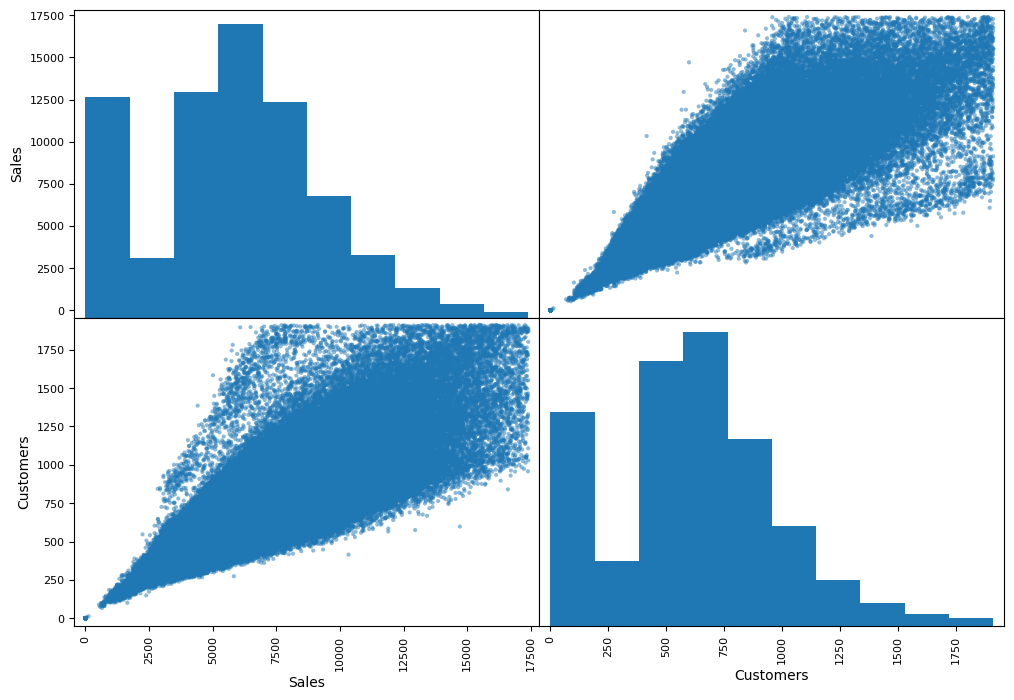

In [ ]:
#Sales_Customers
from pandas.plotting import scatter_matrix
attributes = ["Sales", "Customers"]
scatter_matrix(store_sales_nooutlier[attributes]);

Findings
Higher number of customer leads to higher sales

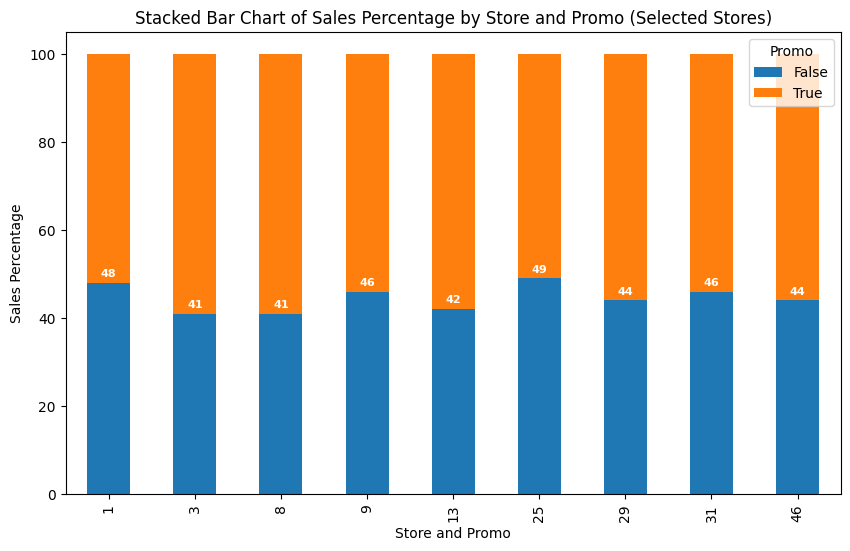

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming grouped_data is a DataFrame
grouped_data = store_sales_nooutlier.groupby(['Store', 'Promo'])['Sales'].sum().unstack()

# Filter stores
selected_stores = [1, 3, 8, 9, 13, 25, 29, 31, 46]
grouped_data = grouped_data[grouped_data.index.isin(selected_stores)]

# Calculate percentage based on the filtered grouped_data and round to 0 decimal places
percentage_data = (grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100).round(0)

# Plot the stacked bar chart
ax = percentage_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Display percentage labels on each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=8, color='white', weight='bold', padding=3)

# Set labels and title
plt.xlabel('Store and Promo')
plt.ylabel('Sales Percentage')
plt.title('Stacked Bar Chart of Sales Percentage by Store and Promo (Selected Stores)')

# Show the plot
plt.show()


In [ ]:
data_store1 = store_sales_nooutlier[(store_sales_nooutlier.Store==1)]
print('Number of records for store 1: ', len(data_store1))
data_store3 = store_sales_nooutlier[(store_sales_nooutlier.Store==3)]
print('Number of records for store 3: ', len(data_store3))
data_store8 = store_sales_nooutlier[(store_sales_nooutlier.Store==8)]
print('Number of records for store 8: ', len(data_store8))
data_store9 = store_sales_nooutlier[(store_sales_nooutlier.Store==9)]
print('Number of records for store 9: ', len(data_store9))
#
data_store13 = store_sales_nooutlier[(store_sales_nooutlier.Store==13)]
print('Number of records for store 13: ', len(data_store13))
data_store25 = store_sales_nooutlier[(store_sales_nooutlier.Store==25)]
print('Number of records for store 25: ', len(data_store25))
data_store29 = store_sales_nooutlier[(store_sales_nooutlier.Store==29)]
print('Number of records for store 29: ', len(data_store29))
data_store31 = store_sales_nooutlier[(store_sales_nooutlier.Store==31)]
print('Number of records for store 31: ', len(data_store31))
#
data_store46 = store_sales_nooutlier[(store_sales_nooutlier.Store==46)]
print('Number of records for store 46: ', len(data_store46))

store_dfs = [data_store1, data_store3, data_store8, data_store9, data_store13, data_store25, data_store29, data_store31, data_store46 ]
label_dfs = ['store1', 'store3', 'store8', 'store9', 'store13', 'store25','store29', 'store31', 'store46']
index = [1,3,8,9,13,25,29,31,46]


left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.2   # the amount of width reserved for blank space between subplots
hspace = 0.8   # the amount of height reserved for white space between subplots


Number of records for store 1:  319
Number of records for store 3:  319
Number of records for store 8:  319
Number of records for store 9:  319
Number of records for store 13:  212
Number of records for store 25:  302
Number of records for store 29:  319
Number of records for store 31:  319
Number of records for store 46:  212


In [ ]:
def plot_store_trend(title, xaxis, yaxis, chart_type,order_list =None):

  # PROMO
  fig, axis = plt.subplots(3, 3, sharex='col', sharey='row', figsize=(10,6))
  fig.suptitle(title)
  fig.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)

  i = 0
  for x in range (0,3):
      for y in range (0,3):
          #i = x + y + int(incr)
          j = index[i]
          label =  label_dfs[i]
          d = store_dfs[i]
          axis[x,y].title.set_text(label)
          if chart_type == 'bar':
            if order_list is None:
              sns.barplot(x=xaxis, y=yaxis, data=d, ax=axis[x,y], palette="Dark2")
            else:
              sns.barplot(x=xaxis, y=yaxis, data=d, ax=axis[x,y], order = order_list, palette="Dark2")

          if chart_type == 'line':
              sns.lineplot(x=xaxis, y=yaxis, data=d, ax=axis[x,y], palette="Dark2")
          elif chart_type == 'box':
              sns.boxplot(x=d[xaxis],whis=1.5, palette="Dark2")
          i = i + 1

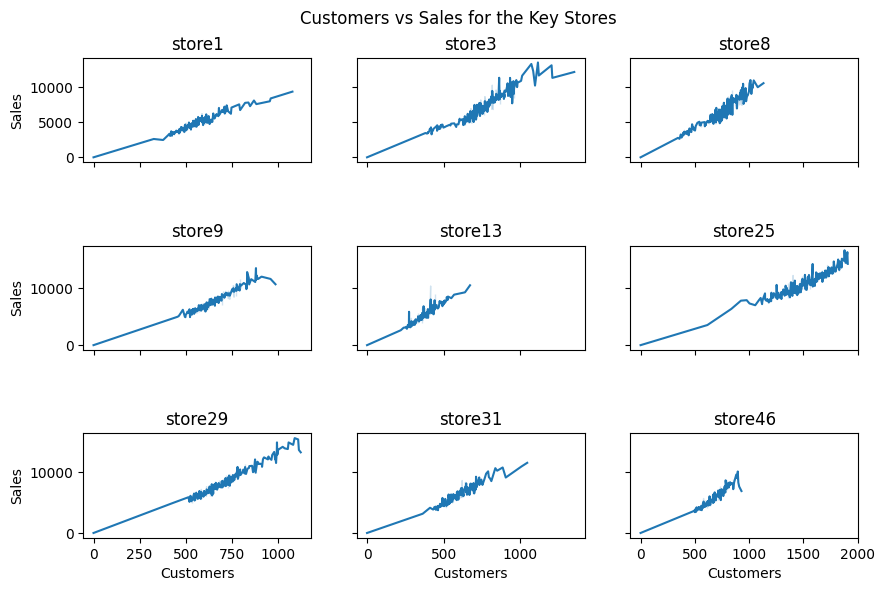

In [ ]:
plot_store_trend('Customers vs Sales for the Key Stores', 'Customers', 'Sales', 'line')

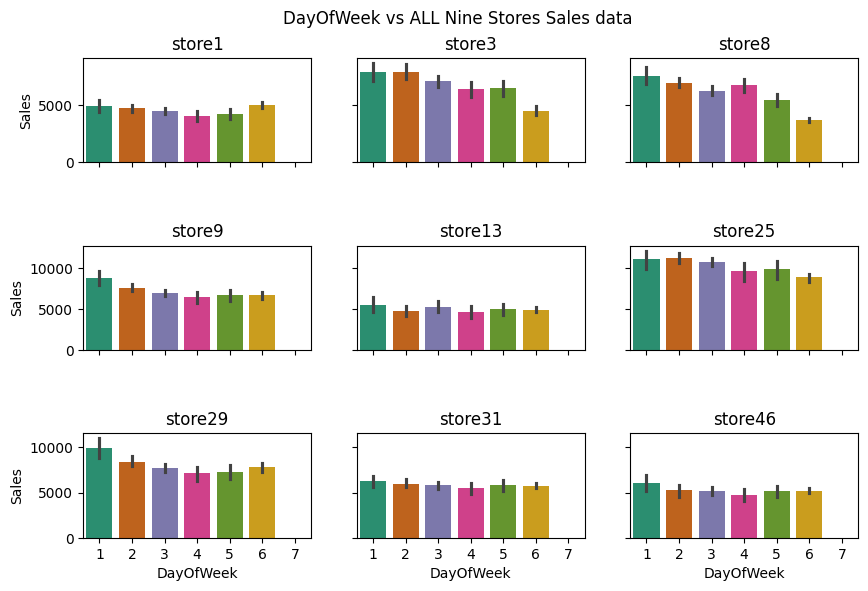

In [ ]:
plot_store_trend('DayOfWeek vs ALL Nine Stores Sales data', 'DayOfWeek', 'Sales', 'bar',[1,2,3,4,5,6,7])

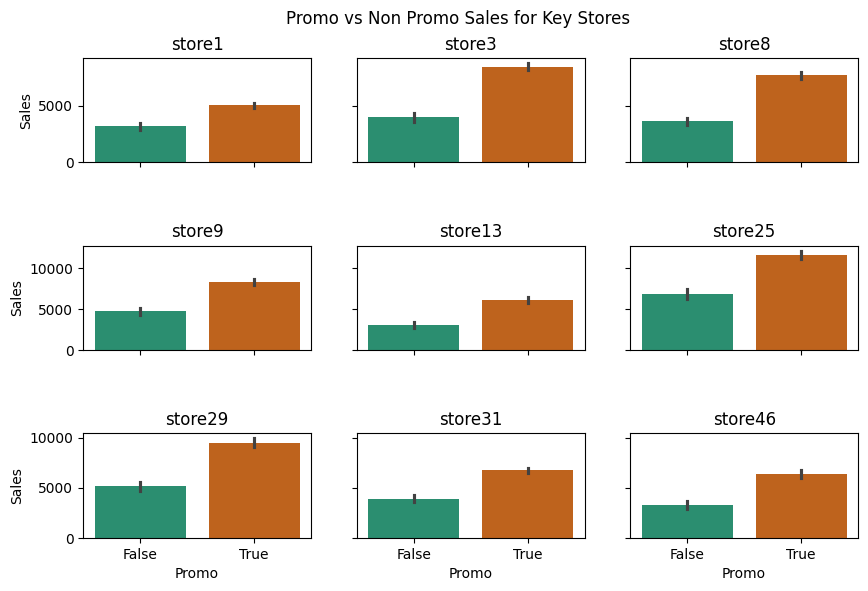

In [ ]:
plot_store_trend('Promo vs Non Promo Sales for Key Stores', 'Promo', 'Sales', 'bar')

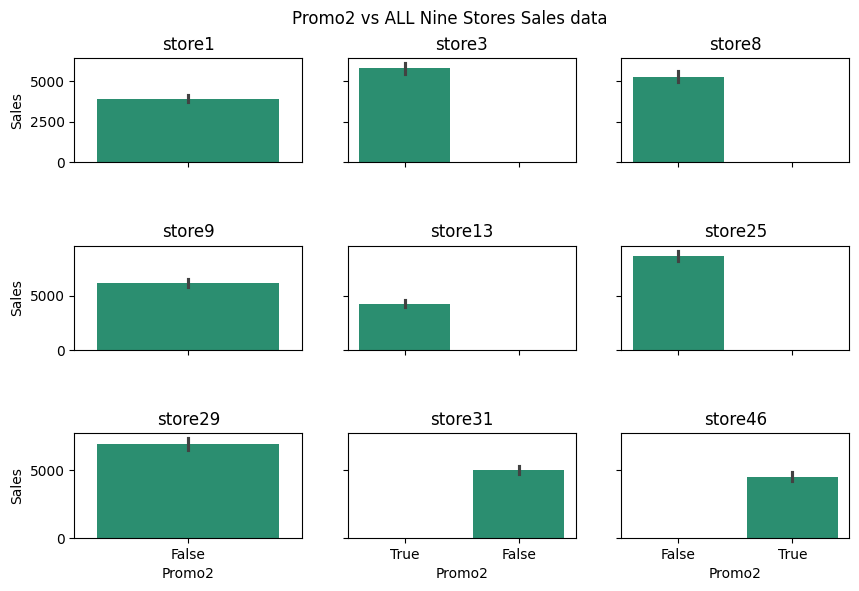

In [ ]:
plot_store_trend('Promo2 vs ALL Nine Stores Sales data', 'Promo2', 'Sales', 'bar')

<Axes: xlabel='Month', ylabel='Sales'>

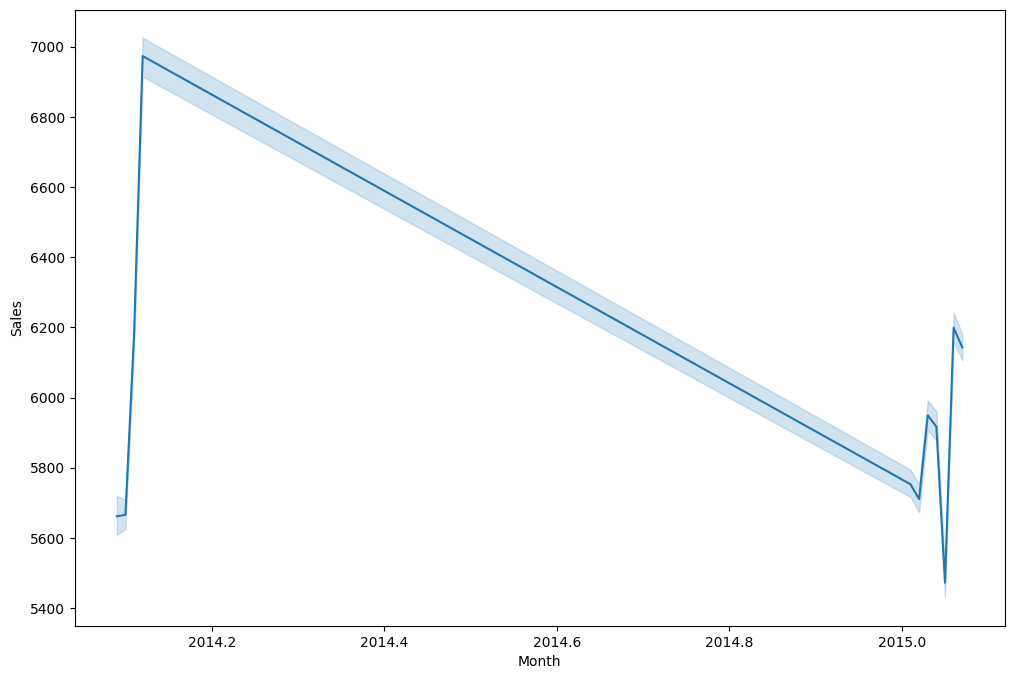

In [ ]:
 sns.lineplot(x='Month', y='Sales', data=store_sales, palette="Dark2")

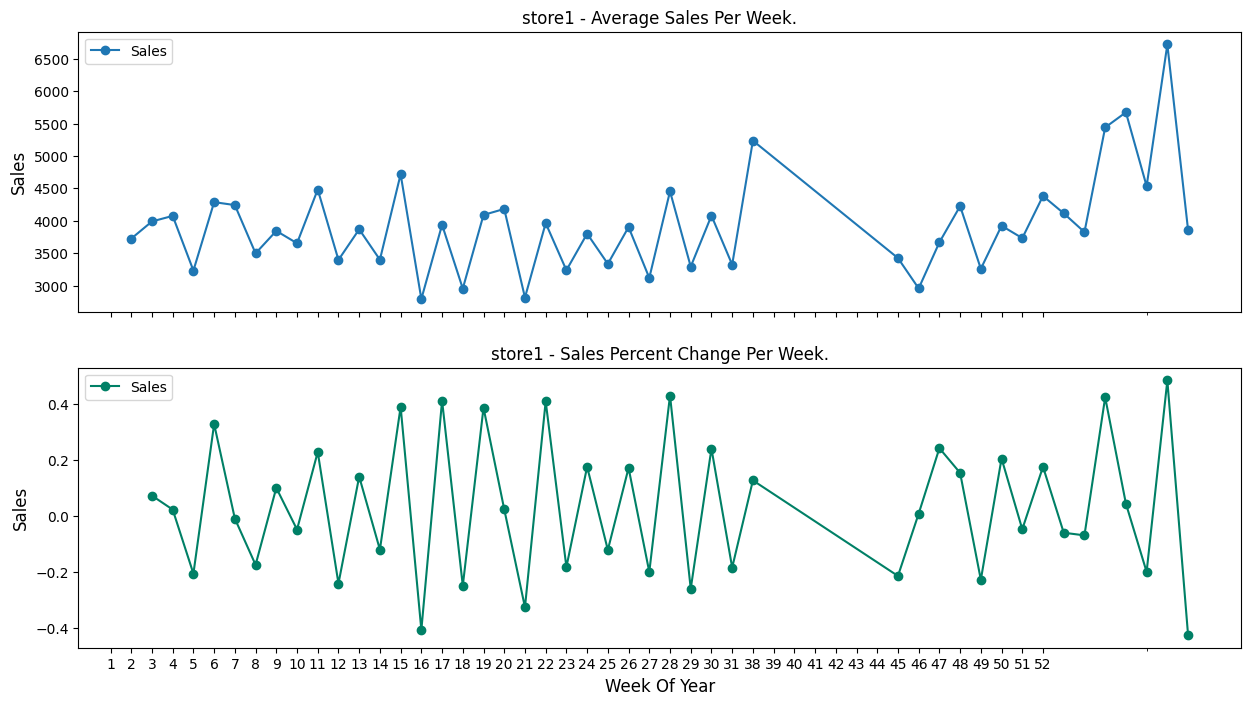

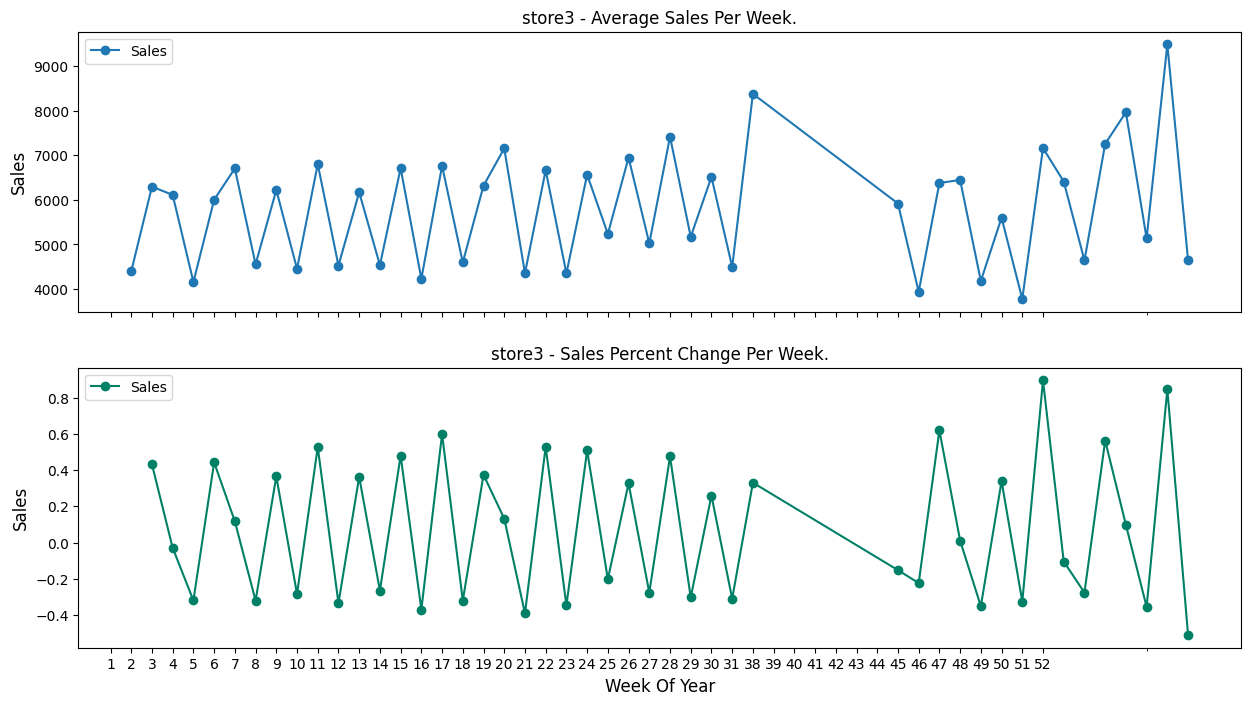

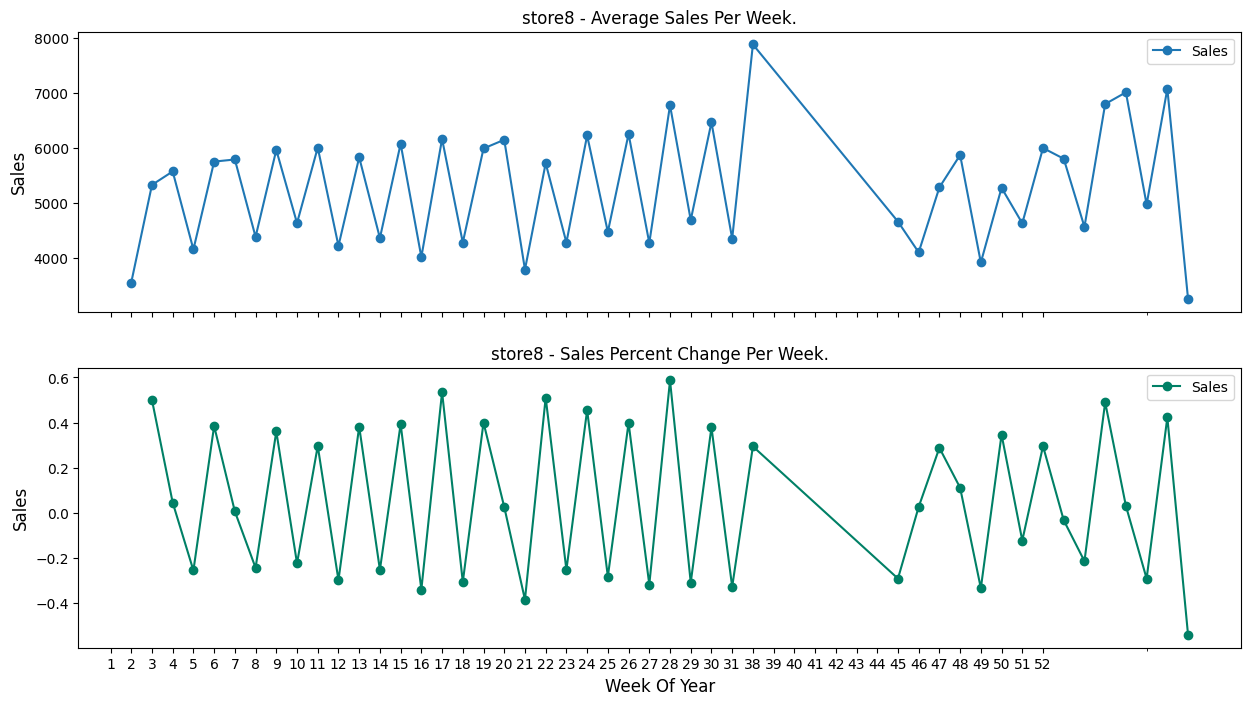

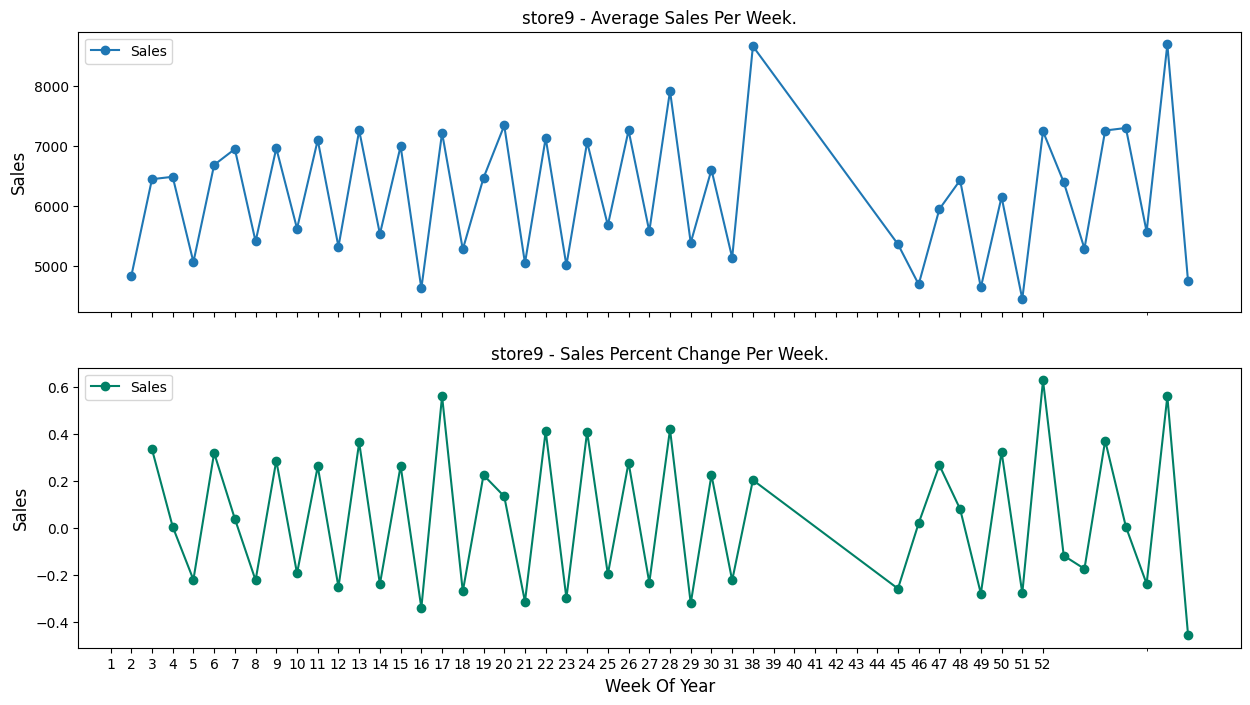

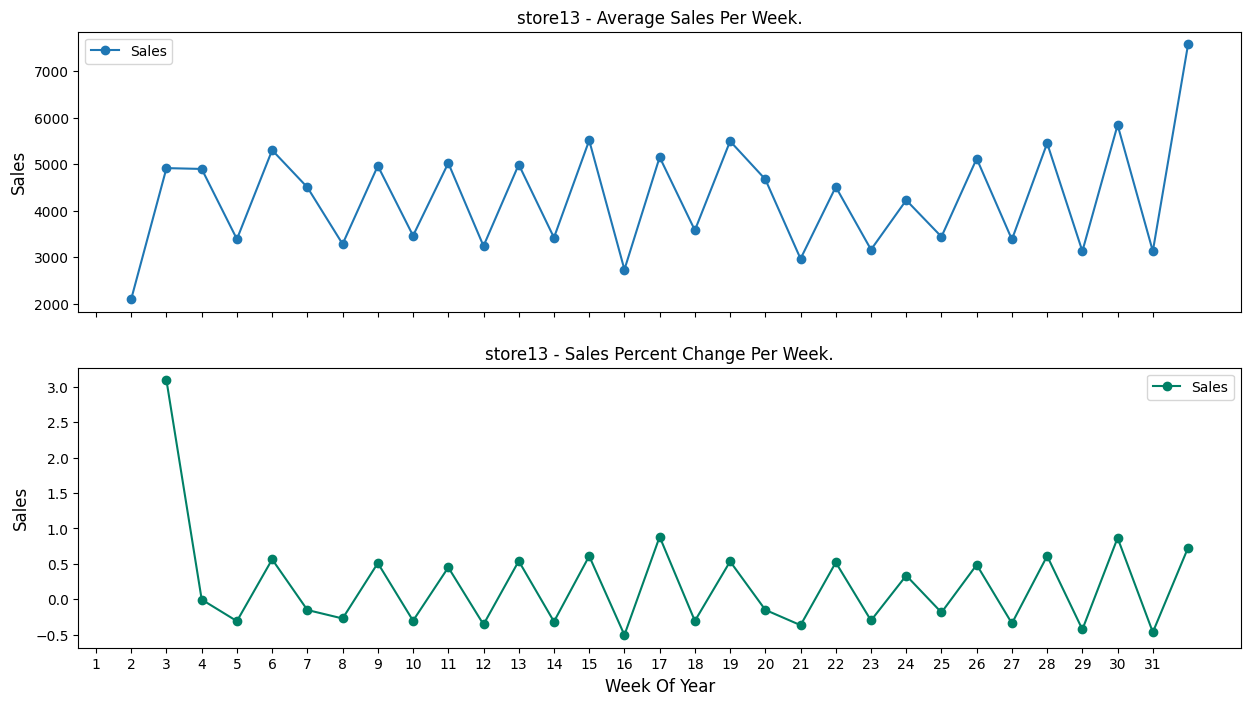

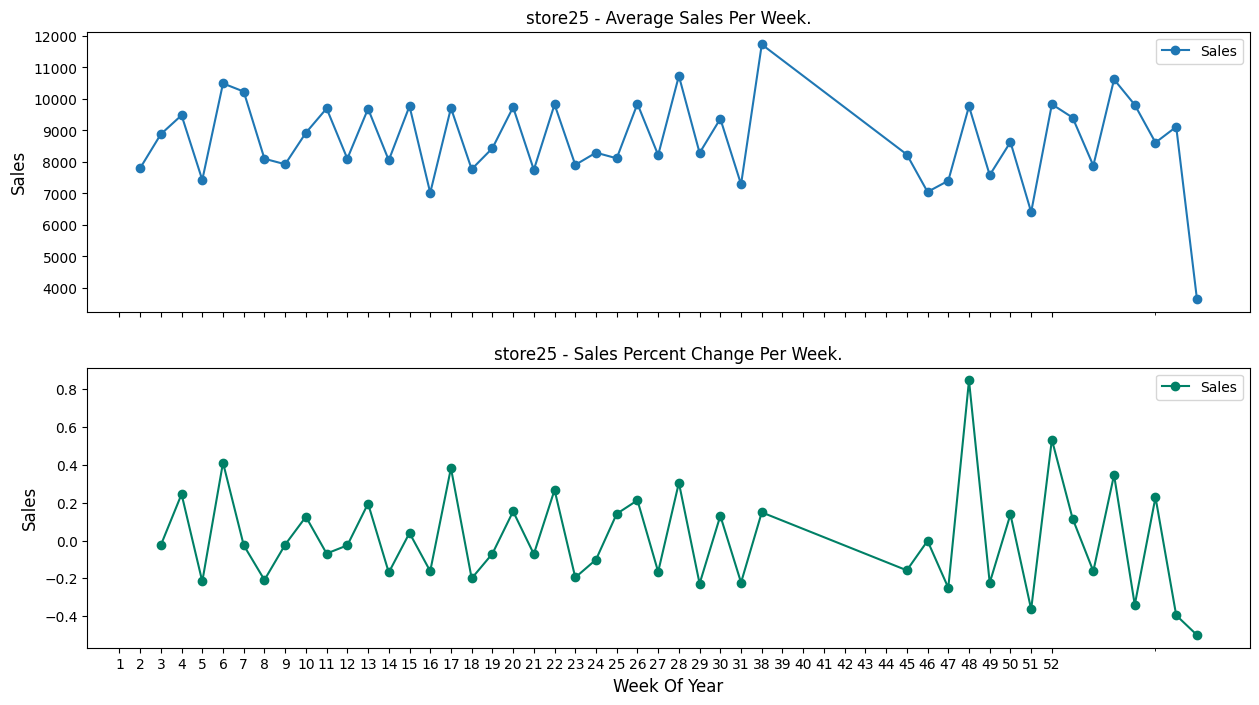

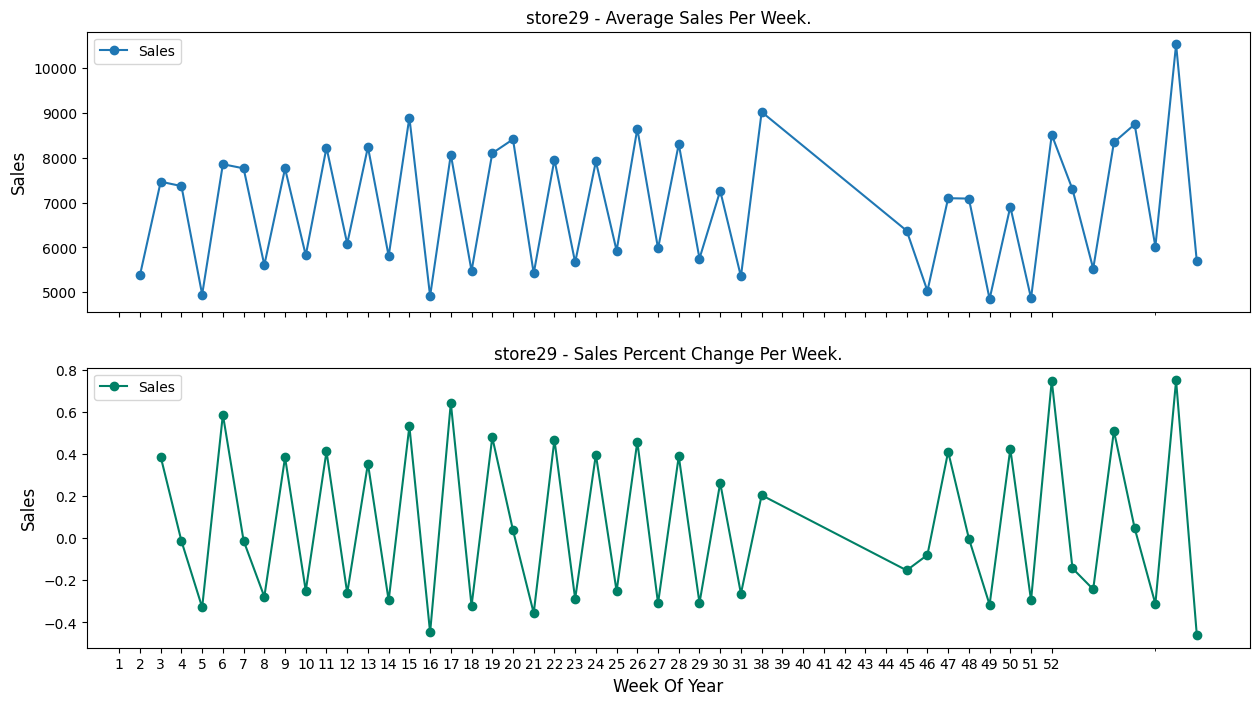

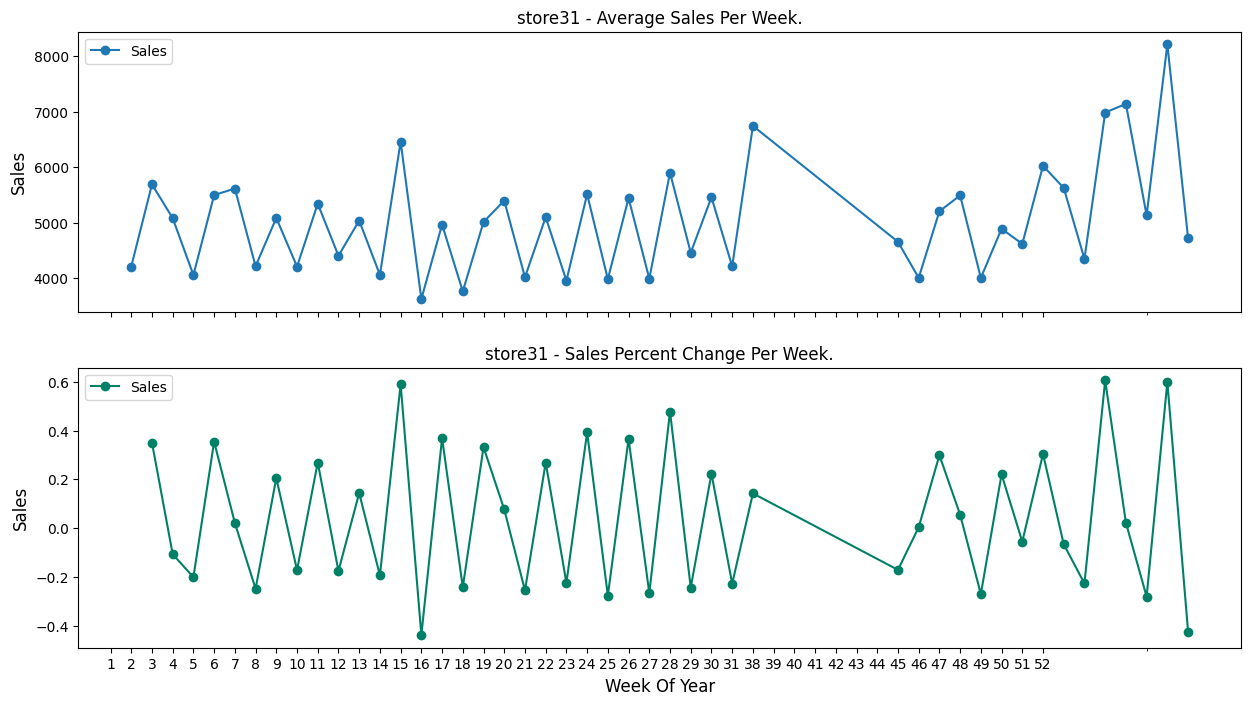

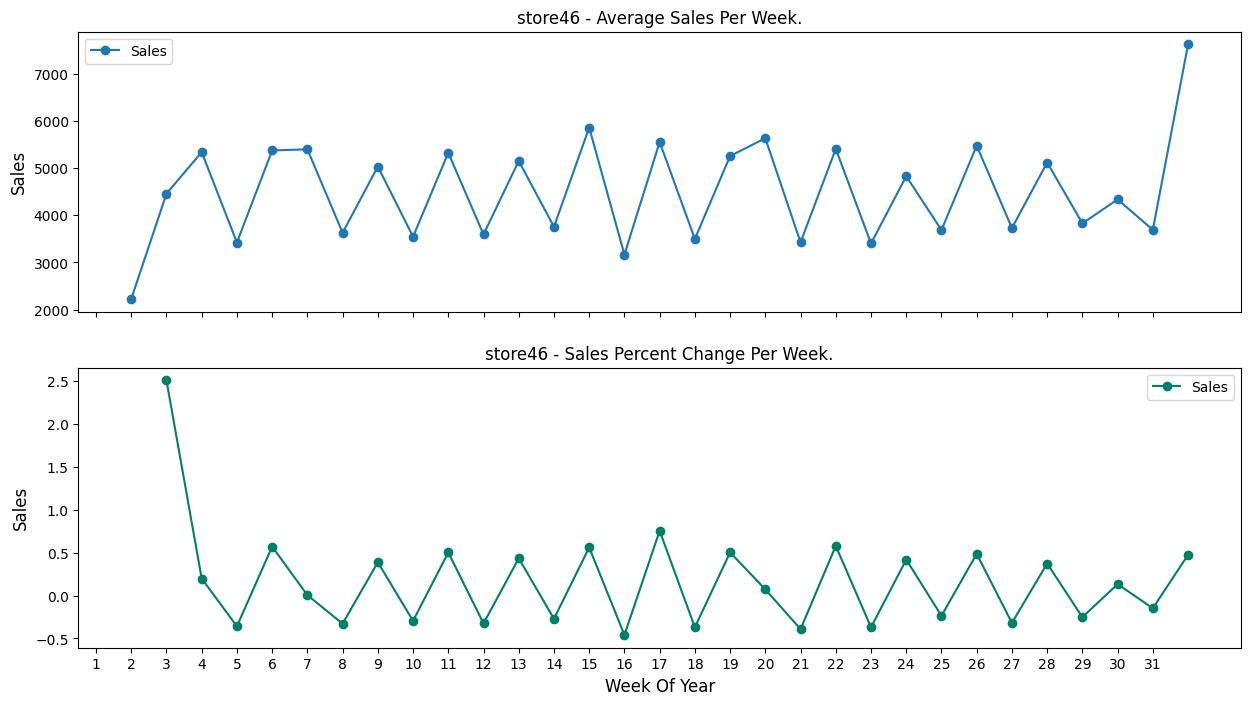

In [ ]:
# Let us plot average sales and pct change in sales
for i in range(0,9):
    d = store_dfs[i]
    label = label_dfs[i]
    # group by WeekofYear and get average sales, and precent change
    average_sales    = d.groupby('Weekofyear')["Sales"].mean()
    pct_change_sales = d.groupby('Weekofyear')["Sales"].sum().pct_change()

    fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

    # plot average sales over time(year-month)
    ax1 = average_sales.plot(legend=True, ax=axis1, marker='o', title=label + " - Average Sales Per Week.")
    ax1.set_xticks(range(len(average_sales)))
    ax1.set_xticklabels(average_sales.index.tolist())
    ax1.set_ylabel('Sales', size=12)

    # plot precent change for sales over time(year-month)
    ax2 = pct_change_sales.plot(legend=True, ax=axis2, marker='o', colormap="summer", title=label + " - Sales Percent Change Per Week.")
    plt.ylabel("Sales", size=12)
    plt.xlabel('Week Of Year', size=12)

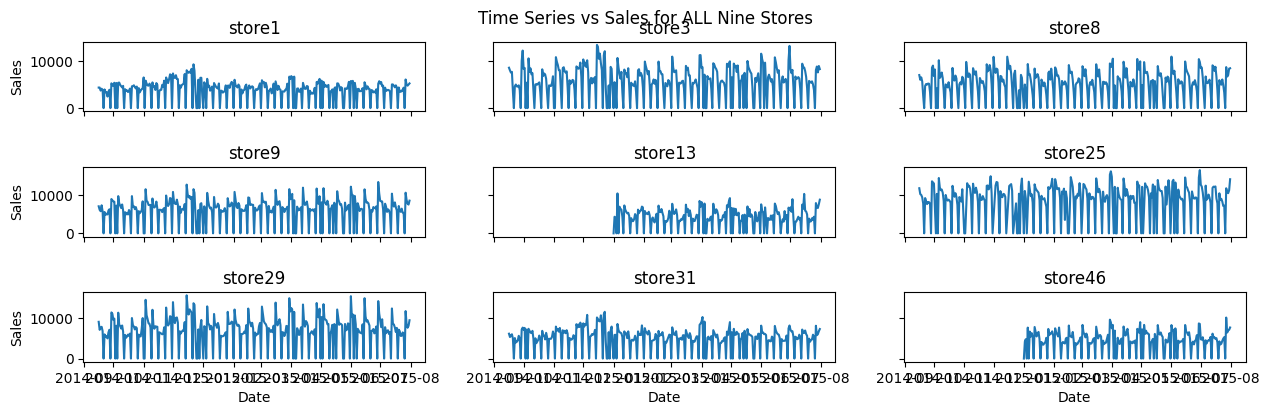

In [ ]:
# Time series with Sales

range_dict = {"0":"1", "1":"3", "2":"5"}
fig, axis = plt.subplots(3, 3, sharex='col', sharey='row', figsize=(15,4))
fig.suptitle('Time Series vs Sales for ALL Nine Stores')
fig.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)

for x in range (0,3):
    incr = range_dict[str(x)]
    for y in range (0,3):
        i = x + y + int(incr)
        label = label_dfs[i-1]
        d = store_dfs[i-1]
        #
        axis[x,y].title.set_text(label)
        sns.lineplot(x=d.Date, y='Sales', data=d, ax=axis[x,y])

In [ ]:
# aggrigating the data for model building
store_sales_grouped = store_sales_nooutlier.groupby(['Date']).agg({'Sales': 'mean',
                                           'Customers':'mean',
                                           'Promo': 'sum',
                                           'StateHoliday_a':'mean','StateHoliday_b':'mean','StateHoliday_c':'mean',
                                           'StoreType_b' : 'mean','StoreType_c' : 'mean','StoreType_d' : 'mean',
                                           'Assortment_b':'mean', 'Assortment_c':'mean',
                                           'DayOfWeek_2':'mean','DayOfWeek_3':'mean',
                                           'DayOfWeek_4':'mean','DayOfWeek_5':'mean',
                                           'DayOfWeek_6':'mean','DayOfWeek_7':'mean'})
store_sales_grouped.head(2)

KeyError: "Column(s) ['Assortment_b', 'Assortment_c', 'DayOfWeek_2', 'DayOfWeek_3', 'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7', 'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c', 'StoreType_b', 'StoreType_c', 'StoreType_d'] do not exist"

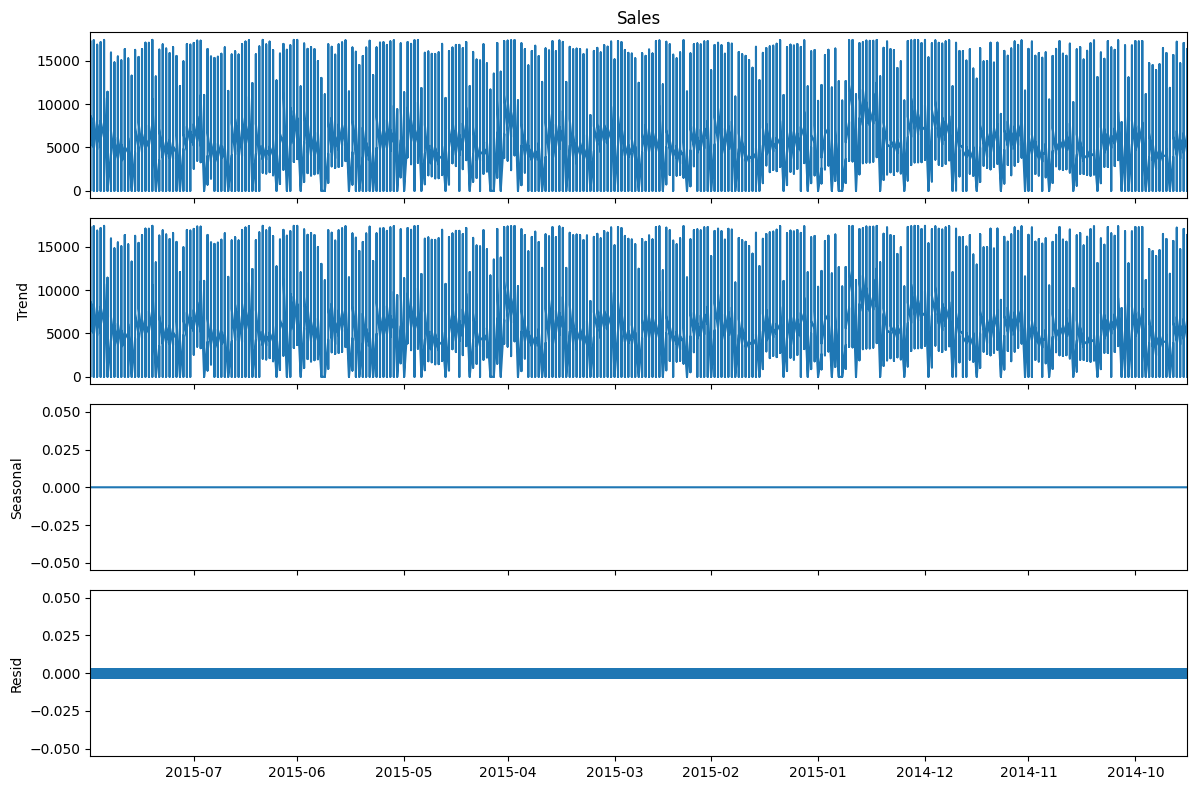

In [ ]:
# Time series Decomposition
from pylab import rcParams
import statsmodels.api as sm
# Set 'ID' column as the index
store_sales_nooutlier.set_index('Date', inplace=True)

rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(store_sales_nooutlier['Sales'], model='additive', period=1)
fig = decomposition.plot()
plt.show()

# Reset the index
store_sales_nooutlier = store_sales_nooutlier.reset_index()

In [ ]:
store_sales_subset = store_sales_nooutlier[
        (store_sales_nooutlier.Store == 1) | (store_sales_nooutlier.Store == 3)| (store_sales_nooutlier.Store == 8)| (store_sales_nooutlier.Store == 9)| (store_sales_nooutlier.Store == 13) |
        (store_sales_nooutlier.Store == 25) | (store_sales_nooutlier.Store == 29)| (store_sales_nooutlier.Store == 31)| (store_sales_nooutlier.Store == 46)
     ]


In [ ]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(store_sales_subset['Sales'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -10.595009
Critical Values @ 0.05: -2.86
p-value: 0.000000


The p-value is 0.00 way under than 0.05 and so according to ADF the series is Stationary

In [ ]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(store_sales_subset['Sales'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.079051
Critical Values @ 0.05: 0.46
p-value: 0.100000


The p-value is 0.1 is higher than 0.05 and so according to KPSS the series is NON-Stationary.

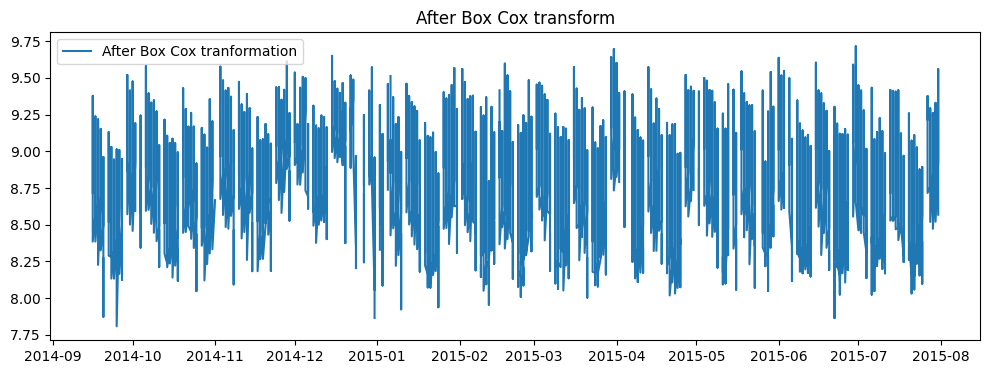

In [ ]:
### Box Cox transformation to make variance constant
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(store_sales_subset['Sales'], lmbda=0), index = store_sales_subset.Date)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.show()

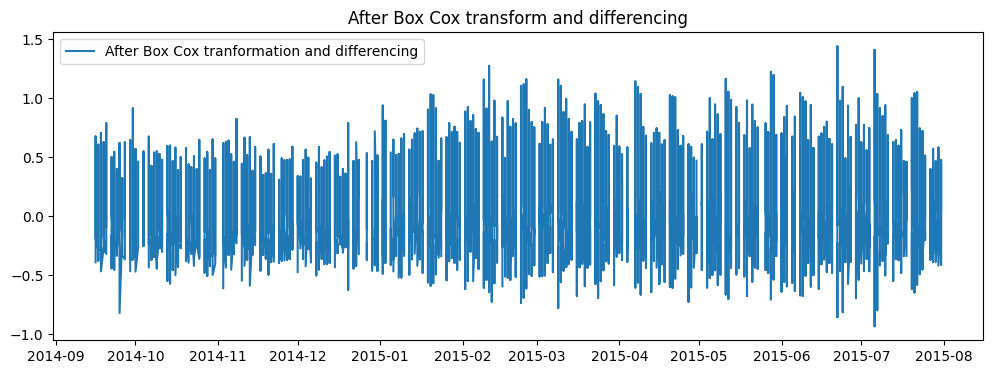

In [ ]:
# Differencing
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), store_sales_subset.Date)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing')
plt.show()

In [ ]:
data_boxcox_diff.dropna(inplace=True)

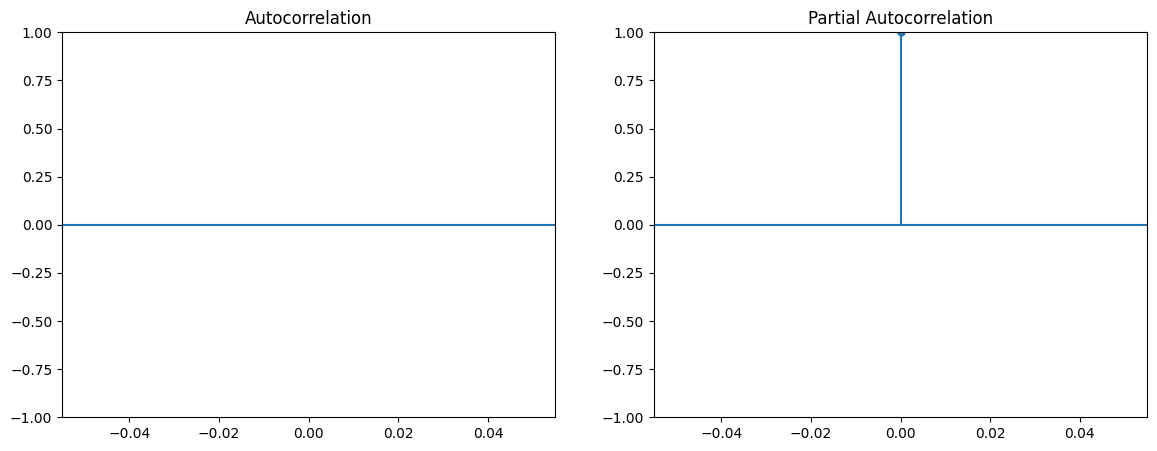

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

fig, ax = plt.subplots(1,2,figsize=(14,5))
sm.graphics.tsa.plot_acf(data_boxcox_diff.squeeze(), lags=30, ax=ax[0])
sm.graphics.tsa.plot_pacf(data_boxcox_diff.squeeze(), lags=30, ax=ax[1])
plt.show()